**Importing and installing all the required libraries**

In [16]:
#!pip install -q hvplot
#!pip install -q xgboost
#!pip install tensorflow
#!pip install -q kaggle

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas
from scipy import stats

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import (accuracy_score,confusion_matrix,classification_report,
                                roc_auc_score,roc_curve,auc,
                                )
from sklearn.metrics import ConfusionMatrixDisplay,RocCurveDisplay
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [39]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC

In [40]:
cc_apps=pd.read_csv('clean_dataset.csv')

In [41]:

# Print summary statistics
cc_apps_description = cc_apps.describe()
print(cc_apps_description)

print("\n")

# Print DataFrame information
cc_apps_info = cc_apps.info()
print(cc_apps_info)

print("\n")

# Inspect missing values in the dataset
print(cc_apps.tail(17))

           Gender         Age        Debt     Married  BankCustomer  \
count  690.000000  690.000000  690.000000  690.000000    690.000000   
mean     0.695652   31.514116    4.758725    0.760870      0.763768   
std      0.460464   11.860245    4.978163    0.426862      0.425074   
min      0.000000   13.750000    0.000000    0.000000      0.000000   
25%      0.000000   22.670000    1.000000    1.000000      1.000000   
50%      1.000000   28.460000    2.750000    1.000000      1.000000   
75%      1.000000   37.707500    7.207500    1.000000      1.000000   
max      1.000000   80.250000   28.000000    1.000000      1.000000   

       YearsEmployed  PriorDefault    Employed  CreditScore  DriversLicense  \
count     690.000000    690.000000  690.000000    690.00000      690.000000   
mean        2.223406      0.523188    0.427536      2.40000        0.457971   
std         3.346513      0.499824    0.495080      4.86294        0.498592   
min         0.000000      0.000000    0.0000

In [42]:

# Import numpy
import numpy as np

# Inspect missing values in the dataset
print(cc_apps.tail(17))

# Replace the '?'s with NaN
cc_apps = cc_apps.replace(to_replace='?',value=np.nan,inplace=False)

# Inspect the missing values again
print(cc_apps.tail(17))

     Gender    Age    Debt  Married  BankCustomer               Industry  \
673       1  29.50   2.000        0             0              Education   
674       0  37.33   2.500        1             1  ConsumerDiscretionary   
675       0  41.58   1.040        1             1        ConsumerStaples   
676       0  30.58  10.665        1             1              Materials   
677       1  19.42   7.250        1             1  CommunicationServices   
678       0  17.92  10.210        1             1             Healthcare   
679       0  20.08   1.250        1             1                 Energy   
680       1  19.50   0.290        1             1             Financials   
681       1  27.83   1.000        0             0            Real Estate   
682       1  17.08   3.290        1             1  ConsumerDiscretionary   
683       1  36.42   0.750        0             0            Real Estate   
684       1  40.58   3.290        1             1  CommunicationServices   
685       1 

In [43]:
# Iterate over each column of cc_apps
for col in cc_apps.columns:
    # Check if the column is of object type
    if cc_apps[col].dtype == 'object':
        # Impute with the most frequent value
        cc_apps = cc_apps.fillna(cc_apps[col].value_counts().index[0])

# Count the number of NaNs in the dataset and print the counts to verify
print(cc_apps.isna().sum())  
     

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
Industry          0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
Approved          0
dtype: int64


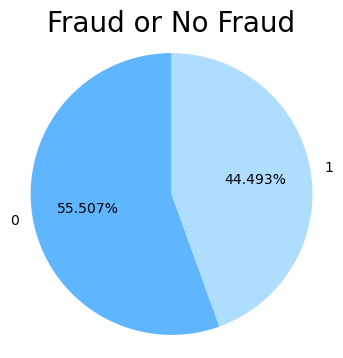

In [44]:

counts = cc_apps["Approved"].value_counts().sort_index()

# Define colors (you can reuse your palette or create new ones)
colors = ["#60B5FF","#AFDDFF"]

# Create the pie chart
plt.figure(figsize=(4 , 4))
plt.pie(
    counts,
    labels=counts.index,
    autopct='%1.3f%%',
    startangle=90,
    colors=colors[:len(counts)]  # match number of quality levels
)

plt.title("Fraud or No Fraud", fontsize=20)
plt.axis('equal')  # Make the pie chart circular
plt.show()
import sklearn
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder
# Instantiate LabelEncoder
le=LabelEncoder()
# Iterate over all the values of each column and extract their dtypes
for col in cc_apps.columns.values:
    # Compare if the dtype is object
    if cc_apps[col].dtypes =='object':
    # Use LabelEncoder to do the numeric transformation
        cc_apps[col]=le.fit_transform(cc_apps[col])

In [45]:


from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Assuming `cc_apps` is still a pandas DataFrame at this point
# Create a new DataFrame with a default integer index
cc_apps.columns = range(cc_apps.shape[1])

# Now, you can drop the columns by their new integer names
cc_apps = cc_apps.drop([11, 13], axis=1)

# The rest of your code
cc_apps = cc_apps.values
X = cc_apps[:, 0:13]  
y = cc_apps[:, 13]    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [46]:
# 1. Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model1 = LogisticRegression(C=1.0, penalty='l2', solver='liblinear')
model1.fit(X_train_scaled, y_train)
pred1 = model1.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, pred1))



Logistic Regression Accuracy: 0.8377192982456141


In [48]:
# 2. Decision Tree Classifer
from sklearn.tree import DecisionTreeClassifier 
model2 = DecisionTreeClassifier(max_depth=5, criterion='gini', random_state=42)
model2.fit(X_train, y_train)
pred2 = model2.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, pred2))

Decision Tree Accuracy: 0.8026315789473685


In [49]:
#3. Random Forest Classifer

model3 = RandomForestClassifier(
    n_estimators=50,
    max_depth=12,
    max_samples=0.3,
    n_jobs=-1,
    random_state=42
)
model3.fit(X_train, y_train)
pred3 = model3.predict(X_test)
print("random forest classifier:", accuracy_score(y_test, pred3))

random forest classifier: 0.8377192982456141


In [50]:
#4. XGBoost - Gradient Boosting
from xgboost import XGBClassifier
model4 = XGBClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    tree_method='hist',
    n_jobs=-1,
    use_label_encoder=False,
    eval_metric='logloss'
)
model4.fit(X_train, y_train)
pred4 = model4.predict(X_test)
print("xgboost:", accuracy_score(y_test, pred4))

xgboost: 0.8377192982456141


C:\Users\saies\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:01:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [51]:
models = {
    "Logistic Regression": pred1,
    "Decision Tree": pred2,
    "Random Forest": pred3,    
    "XGBoost": pred4,
    
}

accuracies = {name: accuracy_score(y_test, pred) for name, pred in models.items()}

colors = [
    "#797D62",
    "#9B9B7A",
    "#D9AE94",
    "#E5C59E",
]

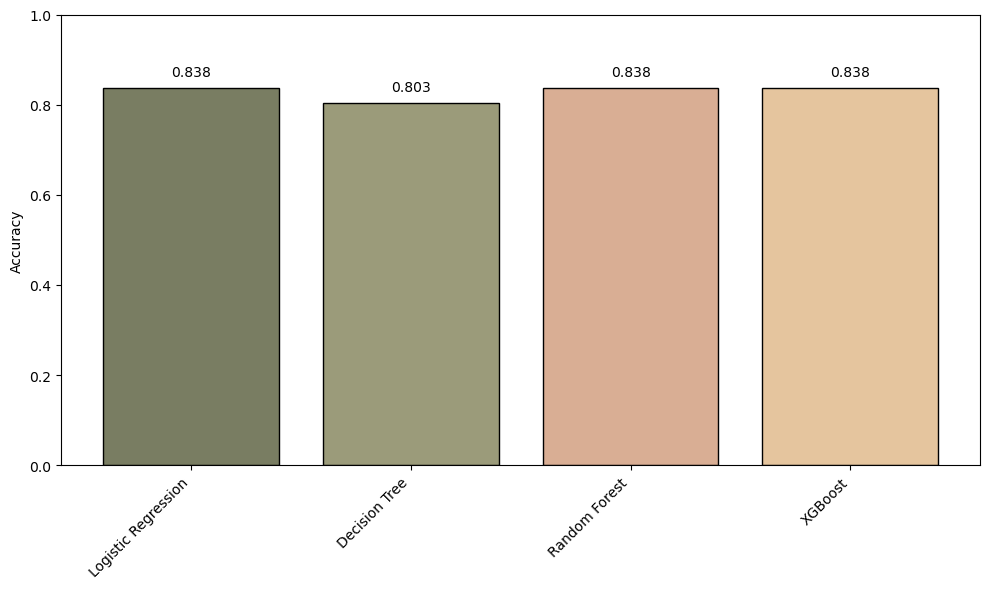

In [52]:
plt.figure(figsize=(10,6))
bars = plt.bar(accuracies.keys(), accuracies.values(), color=colors, edgecolor='black')

plt.ylim(0,1)  # Accuracy ranges between 0 and 1
plt.ylabel("Accuracy")

plt.xticks(rotation=45, ha='right')

# Add accuracy values on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.02, f"{height:.3f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()